In [1]:
import pandas as pd
import NLP

In [2]:
nlp = NLP.Analyze()

In [7]:
df = pd.read_csv("music_api/sample.csv")

In [8]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,duration_ms,time_signature,artist,song,lyrics,sadness,joy,fear,disgust,anger
0,0.746,0.7650,6,-4.410,0,0.0993,0.01120,0.0000,0.0933,0.7370,...,199293,4,BTS,Dynamite,"Dynamite Lyrics\r\n'Cause I, I, I'm in the sta...",0.187188,0.543633,0.127393,0.025322,0.069521
1,0.759,0.4590,8,-5.187,1,0.0948,0.00323,0.0000,0.0788,0.6950,...,164952,4,BTS,Butter,Butter Lyrics\r\nSmooth like butter\r\nLike a ...,0.250484,0.457719,0.108206,0.035956,0.075409
2,0.523,0.4550,9,-14.260,0,0.0632,0.70400,0.4590,0.1350,0.1650,...,76507,4,BTS,OUTRO : The Journey,OUTRO : The Journey Lyrics\r\n\r\n1Embed,0.188554,0.584408,0.063683,0.024344,0.124169
3,0.729,0.3860,2,-5.623,1,0.3820,0.86400,0.5740,0.1140,0.0567,...,74747,4,BTS,OUTRO : Crack,"OUTRO : Crack Lyrics\r\nLet go, let go\r\nLet ...",0.123917,0.525272,0.143418,0.020900,0.048964
4,0.563,0.9090,6,-5.321,0,0.0860,0.00148,0.0028,0.3640,0.5470,...,138973,4,BTS,INTRODUCTION : YOUTH,Introduction: Youth LyricsRomaji\r\nHm hm.. ye...,0.275572,0.429225,0.105903,0.031590,0.052541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2201,0.649,0.2580,1,-13.442,1,0.0363,0.74000,0.0000,0.0799,0.3720,...,189053,4,Charlie Puth,One Call Away - Acoustic,"7/1\nAdam Turley & Ethan Dufault - ""Honest""\nA...",0.213895,0.395622,0.123544,0.065410,0.078435
2202,0.651,0.1980,9,-10.853,1,0.0467,0.95500,0.0000,0.1060,0.1930,...,179439,4,Charlie Puth,Marvin Gaye - Live,"""Bacon"" - Nick Jonas\n""Voodoo"" - Nick Jonas\n""...",0.251482,0.447696,0.084545,0.099427,0.066350
2203,0.432,0.0968,1,-10.245,1,0.0644,0.94600,0.0000,0.1280,0.4020,...,192809,4,Charlie Puth,Some Type of Love - Live,Fa-la-la-la-la\nLa-la-la-la\nRadio MC:\nAlrigh...,0.221922,0.365403,0.113480,0.063482,0.129494
2204,0.667,0.6130,1,-5.353,1,0.0344,0.40300,0.0000,0.1150,0.4700,...,194453,4,Charlie Puth,One Call Away,I'm only one call away\nI'll be there to save ...,0.206863,0.411659,0.145309,0.027883,0.062331


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = len(df) // 50)


47

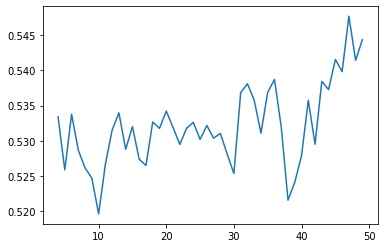

In [37]:
from sklearn.cluster import KMeans
from sklearn import metrics
from matplotlib import pyplot as plt

columns = [col for col in df.columns if col not in ["artist" , "song", "type", "id", "uri",	"track_href", "analysis_url", "lyrics"
]]

def optimal_k_means(num_clusters):
    sil_arr = {}
    for n in range(4, num_clusters):
        kmeans = KMeans(n_clusters = n, random_state = 1).fit(df[columns])
        score = metrics.silhouette_score(df[columns], kmeans.labels_, metric = 'euclidean')
        sil_arr[n] = score
    max_score = max(sil_arr.values())
    plt.plot(sil_arr.keys(), sil_arr.values())
    for key, value in sil_arr.items():
        if (value == max_score):
            return key

optimal_k_means(50)


In [43]:
df["cluster"] = KMeans(n_clusters = 47, random_state = 1).fit_predict(df[columns])
cluster_map = {}
for c in range(47):
    print(c, len(df[df["cluster"] == c]))

0 62
1 60
2 89
3 20
4 3
5 10
6 13
7 89
8 33
9 2
10 115
11 76
12 14
13 84
14 42
15 12
16 18
17 37
18 1
19 24
20 88
21 96
22 3
23 79
24 22
25 130
26 45
27 4
28 31
29 110
30 16
31 24
32 68
33 4
34 43
35 18
36 118
37 24
38 18
39 101
40 11
41 89
42 66
43 2
44 84
45 43
46 65


In [21]:
import music_api.track_analysis as track_a
from sklearn import datasets

In [14]:
ta = track_a.TrackAnalysis()

Searching for "Kun Faya Kun" by A.R. Rahman...
Done.


ValueError: Found input variables with inconsistent numbers of samples: [1, 2206]